In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('dataset.csv',parse_dates=['LastUpdated'])
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [10]:
"""
Do a bit of data cleaning:

Rename some columns
Create three new date/time columns for later aggregations
Filter down to only two garage locations
"""

df.rename(columns={'SystemCodeNumber':'Location','LastUpdated':'TimeStamp'},inplace=True)

In [11]:
df['Day']=df.TimeStamp.dt.date
df['Month']=df.TimeStamp.dt.month
df['Hour']=df.TimeStamp.dt.hour

park = df[df.Location.isin(['Broad Street', 'NIA South'])]


In [12]:
park.head()

,Location,Capacity,Occupancy,TimeStamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


In [16]:
sns.set_style('dark')
months = [
    pd.to_datetime('2016-10-01'),
    pd.to_datetime('2016-11-01'),
    pd.to_datetime('2016-12-01'),
]
plt.rc('date.autoformatter',day=' %b %Y')
# this sets the format oof date that appears in the plot

([<matplotlib.axis.XTick at 0x17e707130>,
 [Text(17075.0, 0, ' Oct 2016'),
  Text(17106.0, 0, ' Nov 2016'),
  Text(17136.0, 0, ' Dec 2016')])

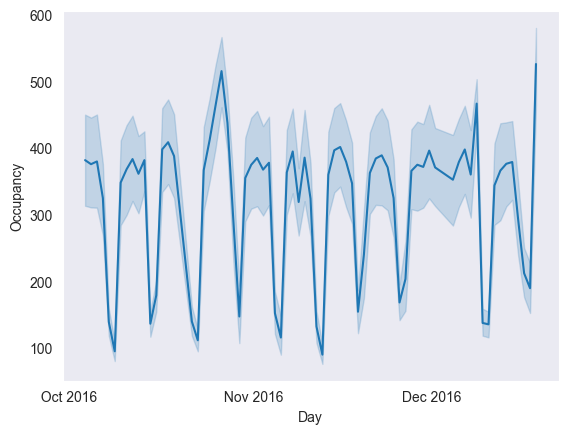

In [19]:
sns.lineplot(x='Day',y='Occupancy',data=park)
plt.xticks(months)
# this filters x axes data

# the shades region is the confidence region of 95% confidence

<Axes: xlabel='Hour', ylabel='Occupancy'>

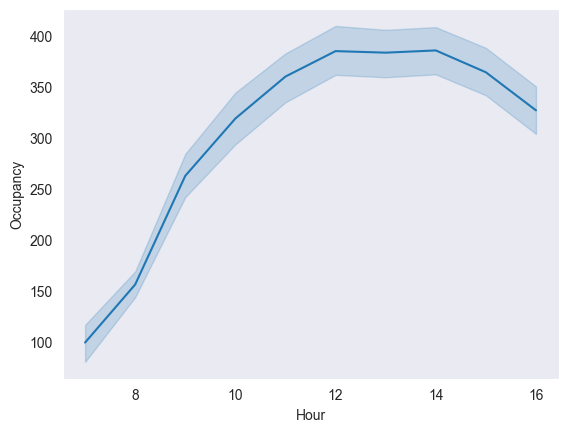

In [20]:
sns.lineplot(x='Hour',y='Occupancy',data=park)

# here the main dark blue line is the mean value like in below graph at 12th hour their are hundreds of value and the blue line at that x axis represent mean of all such values and now confidence intervals are build using bootstrapping

# bootstrap data is created from original data with replacement that is one value of hour can bes chosen any number of times , the size of such dataset is same as that of data available but since one could be chosen multiple times so they will not always be same
# by default 1000 such datasets are created and now mean is calculatred for all sample values and these means are sorted and a range is chosen such that 95% of mean lies in the range and then the confidence intervals are created 

<Axes: xlabel='Hour', ylabel='Occupancy'>

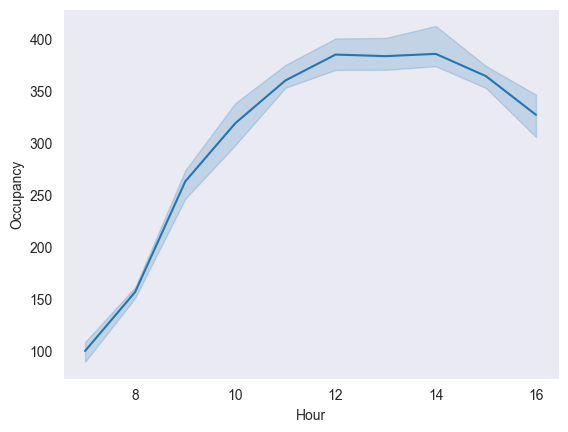

In [25]:
sns.lineplot(x='Hour',y='Occupancy',data=park,n_boot=10)
# now boot stram sample are decreased from 1000 to 10 so their are many variance in the confidence interval i.e running code multiple times renders very different  confidence level each time

<Axes: xlabel='Hour', ylabel='Occupancy'>

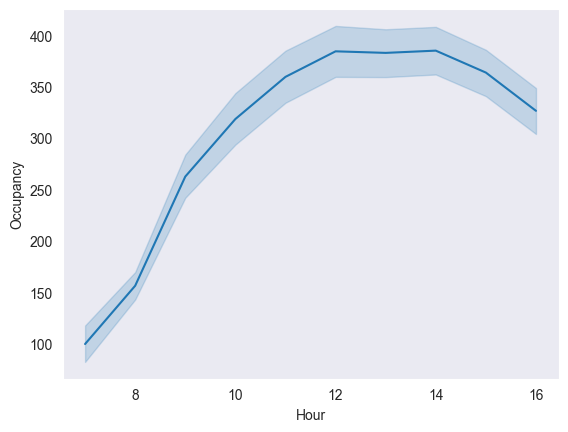

In [23]:
sns.lineplot(x='Hour',y='Occupancy',data=park,n_boot=10000)
# this graph will have less variance but will take more time to render so 1000 is the sweet spot

<Axes: xlabel='Hour', ylabel='Occupancy'>

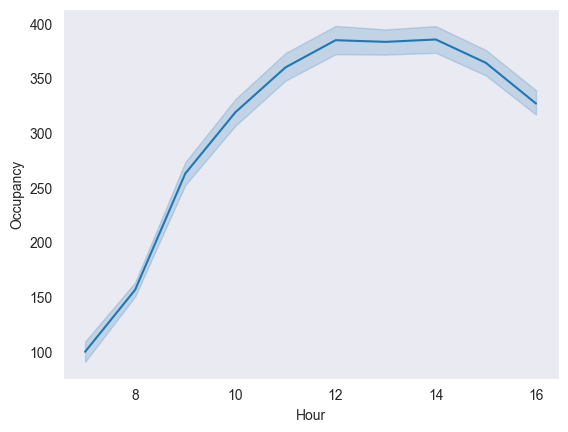

In [30]:
sns.lineplot(x='Hour',y='Occupancy',data=park,errorbar=('ci',68))
# this changes the confidence interval i.e the percentage of confidence in which mean are chosen


<Axes: xlabel='Hour', ylabel='Occupancy'>

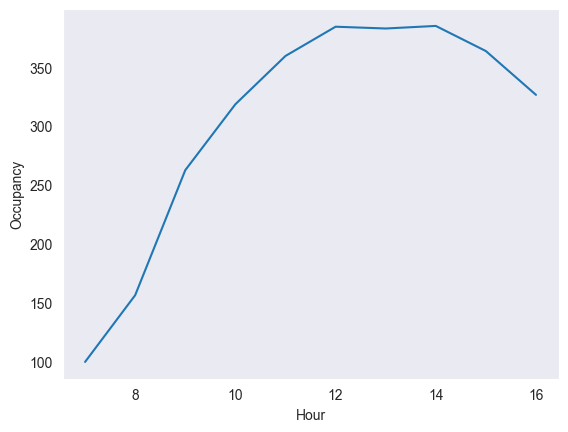

In [33]:
sns.lineplot(x='Hour',y='Occupancy',data=park,errorbar=None)
# this switches off the confidence level and thus saving a lot of time

<Axes: xlabel='Hour', ylabel='Occupancy'>

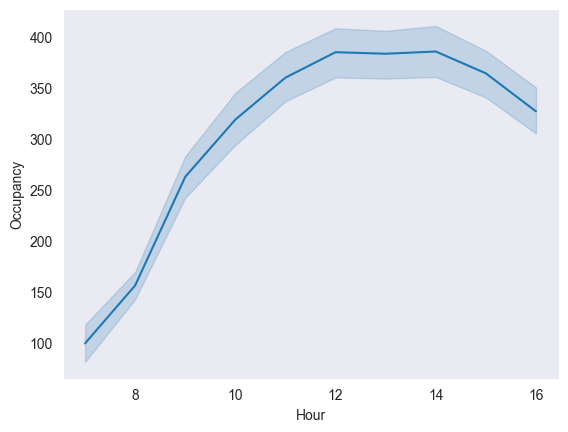

In [34]:
sns.lineplot(x='Hour',y='Occupancy',data=park,estimator='mean')
# estimator is the what the line shows , by default it is set to mean we can change it to something like standard deviation 

<Axes: xlabel='Hour', ylabel='Occupancy'>

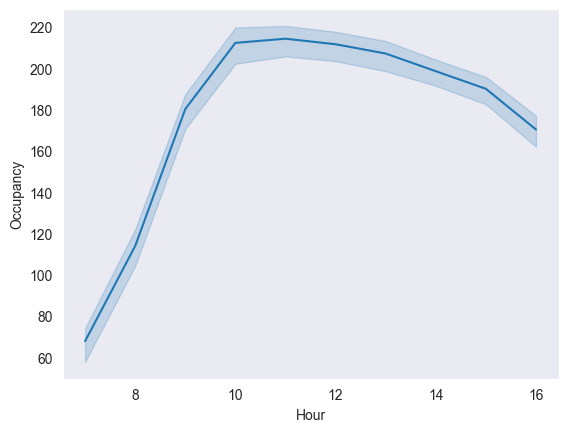

In [36]:
sns.lineplot(x='Hour',y='Occupancy',data=park,estimator='std')
# standard deviation

<Axes: xlabel='Hour', ylabel='Occupancy'>

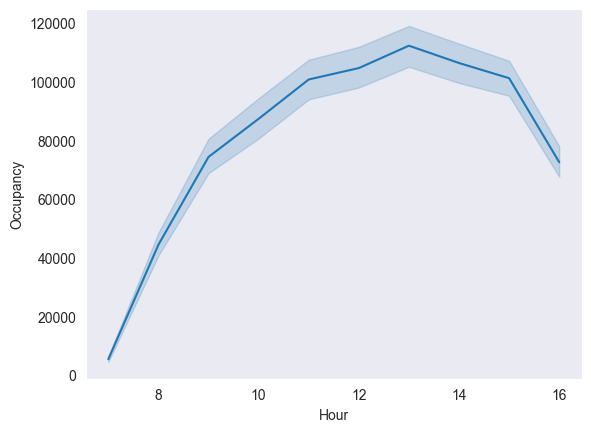

In [37]:
sns.lineplot(x='Hour',y='Occupancy',data=park,estimator='sum')

([<matplotlib.axis.XTick at 0x281990a90>,
 [Text(17075.0, 0, ' Oct 2016'),
  Text(17106.0, 0, ' Nov 2016'),
  Text(17136.0, 0, ' Dec 2016')])

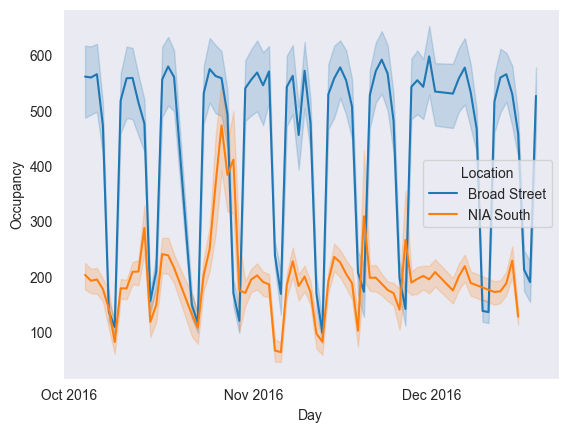

In [38]:
sns.lineplot(x='Day',y='Occupancy',data=park,hue='Location')
plt.xticks(months)

([<matplotlib.axis.XTick at 0x281a302b0>,
 [Text(17075.0, 0, ' Oct 2016'),
  Text(17106.0, 0, ' Nov 2016'),
  Text(17136.0, 0, ' Dec 2016')])

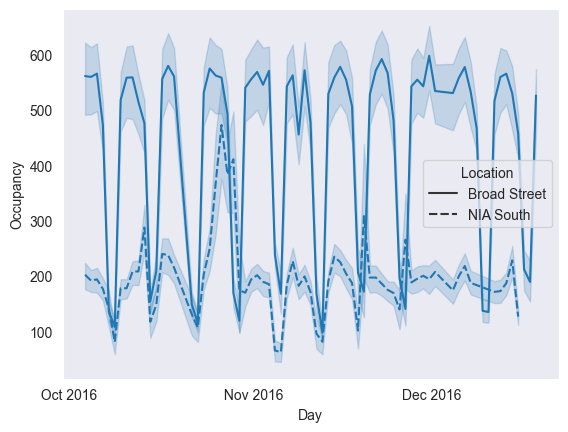

In [40]:
sns.lineplot(x='Day',y='Occupancy',data=park,style='Location')
plt.xticks(months)

([<matplotlib.axis.XTick at 0x281ac98b0>,
 [Text(17075.0, 0, ' Oct 2016'),
  Text(17106.0, 0, ' Nov 2016'),
  Text(17136.0, 0, ' Dec 2016')])

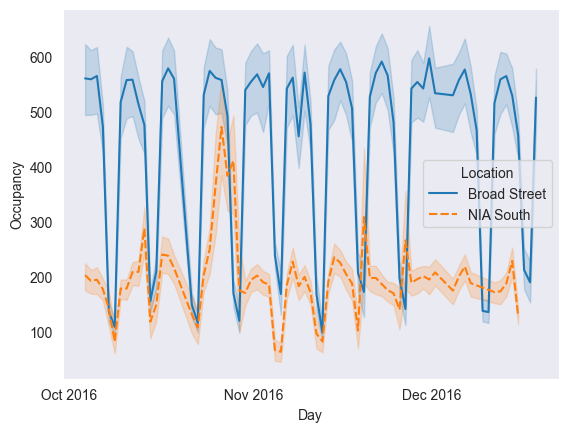

In [41]:
sns.lineplot(x='Day',y='Occupancy',data=park,style='Location',hue='Location')
plt.xticks(months)

<Axes: xlabel='Hour', ylabel='Occupancy'>

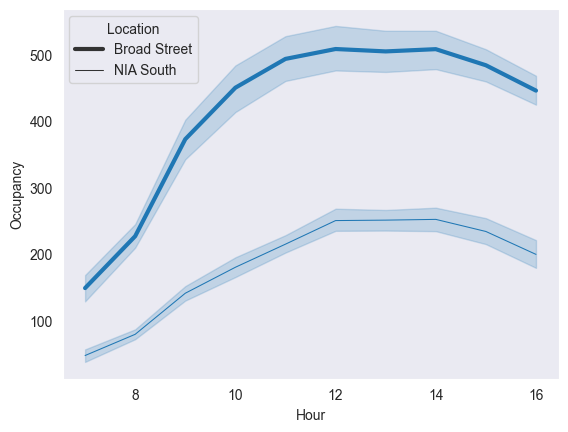

In [42]:
sns.lineplot(x='Hour',y='Occupancy',data=park,size='Location')

<Axes: xlabel='Hour', ylabel='Occupancy'>

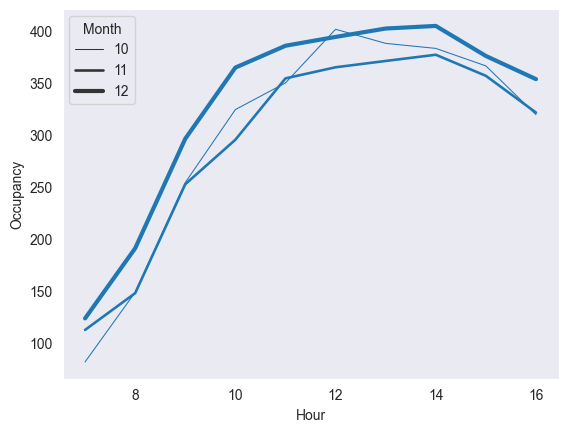

In [44]:
sns.lineplot(x='Hour',y='Occupancy',data=park,size='Month',errorbar=None)